<a href="https://colab.research.google.com/github/lha2326/Midterm-MindX-Course-3/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mind-X Bài thi giữa kì**

Predict Loan Pay Off ( Logistic Regression )

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **I. Data**

In [ ]:
#Import data
link = 'https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv'
df = pd.read_csv(link,encoding= 'unicode_escape')

In [ ]:
#Đọc 5 dòng đầu tiên
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
#Hiển thị số dòng và số cột của data
df.shape

(346, 10)

In [ ]:
#Liệu có các giá trị null ở mỗi cột?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   Unnamed: 0      346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [ ]:
#Tính khoảng độ tuổi của khách hàng
df.describe()

,Unnamed: 0.1,Unnamed: 0,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [ ]:
#Xem các giá trị và số lượng có trong cột loan_status
df.groupby('loan_status').size()

loan_status
COLLECTION     86
PAIDOFF       260
dtype: int64

In [ ]:
#Xem các giá trị và số lượng có trong cột Principal
df.groupby('Principal').size()

Principal
300       3
500       2
800      81
900       2
1000    258
dtype: int64

In [ ]:
#Xem các giá trị và số lượng có trong cột terms
df.groupby('terms').size()

terms
7      14
15    148
30    184
dtype: int64

In [ ]:
#Xem các giá trị và số lượng có trong cột  education
df.groupby('education').size()

education
Bechalor                 44
High School or Below    151
Master or Above           2
college                 149
dtype: int64

Dữ liệu bao gồm 10 cột và 346 dòng, các cột đầy đủ thông tin và không có cột nào chứa giá trị null, trong đó: 

* Cột 1 và cột 2 không chứa thông tin 
* Cột 3: tình trạng vay, gồm 2 giá trị, đó là collection (vẫn đang trả góp) và paidoff (đã trả xong). Tình trạng PAIDOFF gấp tình trang COLLECTION khoảng 3 lần.
* Cột 4: các gói vay, gồm 5 giá trị.
* Cột 5: kỳ hạn, là thời gian cho từng đợt trả góp, gồm 3 giá trị.
* Cột 6: ngày gói vay bắt đầu có hiệu lực.
* Cột 7: ngày trả góp gói vay lần đầu tiên.
* Cột 8: tuổi của khách hàng tham gia gói vay, số tuổi giới hạn từ 18 tới 51 tuổi.
* Cột 9: học vấn của khách hàng tham gia gói vay, gồm 4 giá trị.
* Cột 10: giới tính của khách hàng tham gia gói vay, gồm 2 giá trị.



## **II. EDA**

In [ ]:
#Tiến hành loại bỏ cột 1 và cột 2
df1 = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [ ]:
df1.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
#Đếm số lượng tình trạng học vấn nhóm theo loan_status
df1.groupby(['loan_status'])['education'].value_counts()

loan_status  education           
COLLECTION   High School or Below     39
             college                  35
             Bechalor                 11
             Master or Above           1
PAIDOFF      college                 114
             High School or Below    112
             Bechalor                 33
             Master or Above           1
Name: education, dtype: int64

* Quan sát thấy, so với bộ dữ liệu gồm 346 dòng thì giá trị 'Master or Above' này có phần trăm khá nhỏ và được chia đều vào COLLECTION và PAIDOFF nên ta sẽ suy nghĩ tới việc loại bỏ giá trị này.

In [ ]:
#Tính phần trăm tình trạng vay theo giới tính
df1.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [ ]:
#Đếm số lượng gói vay theo giới tính
df1.groupby('Gender')['Principal'].value_counts()

Gender  Principal
female  1000          38
        800           12
        500            1
        900            1
male    1000         220
        800           69
        300            3
        500            1
        900            1
Name: Principal, dtype: int64

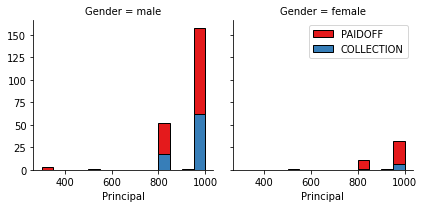

In [ ]:
#Trực quan hóa dữ liệu về khoản vay và tình trạng vay theo giới tính 
bins = np.linspace(df1['Principal'].min(), df1['Principal'].max(), 15)
g = sns.FacetGrid(df1, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

* Qua biểu đồ trên, ta thấy đối tượng khách hàng là nam giới có xu hướng đi vay là nhiều hơn so với đối tượng khách hàng là nữ giới.
* Gói vay được lựa chọn nhiều nhất trên cả hai đối tượng nam giới và nữ giới đều là gói vay 1000. 
* Ở trạng thái PAIDOFF, nữ giới có tỉ lệ cao hơn nam giới (83% so với 73%).

In [ ]:
#Chia 3 nhóm tuổi. Nhóm 1 từ 18 tới 24 tuổi, nhóm 2 từ 25 tới 40 tuổi và nhóm 3 từ 41 tới 51 tuổi
df1.loc[df1['age'] < 25, 'age_group'] = int(1)
df1.loc[(df1['age'] >=25)&(df1['age'] < 41), 'age_group'] = int(2)
df1.loc[df1['age'] >=41, 'age_group'] = int(3)

In [ ]:
#Đếm số lượng gói vay theo nhóm tuổi
df1.groupby(['age_group'])['Principal'].value_counts()

age_group  Principal
1.0        1000          30
           800            7
           500            2
           300            1
2.0        1000         215
           800           64
           300            2
           900            2
3.0        1000          13
           800           10
Name: Principal, dtype: int64

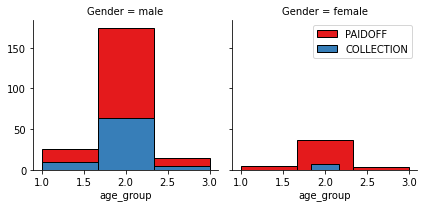

In [ ]:
#Trực quan hóa dữ liệu về khoản vay và tình trang vay theo nhóm tuổi
g = sns.FacetGrid(df1, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age_group', bins=3, ec="k")
g.axes[-1].legend()
plt.show()

* Qua biểu đồ trên, ta thấy độ tuổi khách hàng có xu hướng vay nhiều ở cả nam giới và nữ giới là từ 25 dến 40 tuổi, đây là độ tuổi đi làm nên số lượng khách hàng vay sẽ nhiều nhất.
* Tiếp theo đó là độ tuổi từ 18 tới 25 tuổi, khách hàng ở độ tuổi này chủ yếu là sinh viên, họ có nhu cầu vay để thực hiện chi trả các chi phí học tập.
*  Độ tuổi ít vay nhất là độ tuổi từ 40 tới 51 tuổi, độ tuổi này là những khách hàng đã đi làm thời gian dài nên dành dụm được số tiền nhất định nên nhu cầu vay là không cao.

In [ ]:
#Đếm số lượng gói vay theo kỳ hạn vay
df1.groupby(['terms'])['Principal'].value_counts()

terms  Principal
7      1000           8
       300            3
       500            1
       800            1
       900            1
15     800           75
       1000          71
       500            1
       900            1
30     1000         179
       800            5
Name: Principal, dtype: int64

In [ ]:
#Đếm số lượng kỳ hạn vay theo nhóm tuổi
df1.groupby(['age_group'])['terms'].value_counts()

age_group  terms
1.0        30        23
           15        15
           7          2
2.0        30       152
           15       119
           7         12
3.0        15        14
           30         9
Name: terms, dtype: int64

* Gói vay được ưa thích nhất là gói vay trị giá 1000, với kỳ hạn trả tiền vay là 30 ngày.
* Độ tuổi vay nhiều nhất là 25-40 tuổi với kỳ hạn trả tiền là 30 ngày, tiếp đó là 15 ngày.

In [ ]:
#Chuyển ngày tháng về dạng date time
df1['due_date'] = pd.to_datetime(df1['due_date'])
df1['effective_date'] = pd.to_datetime(df1['effective_date'])
df1.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_group
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3.0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,2.0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,2.0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,2.0
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,2.0


In [ ]:
#Kiểm tra ngày gói vay bắt đầu có hiệu lực có phải ngày cuối tuần hay không?
df1["Is Weekend 1"] = df1['due_date'].dt.day_name().isin(['Saturday', 'Sunday'])

In [ ]:
df1['Is Weekend 1'].value_counts(normalize = True)

False    0.696532
True     0.303468
Name: Is Weekend 1, dtype: float64

In [ ]:
#Kiểm tra ngày trả khoản vay lần đầu tiên có phải ngày cuối tuần hay không?
df1["Is Weekend 2"] = df1['effective_date'].dt.day_name().isin(['Saturday', 'Sunday'])

In [ ]:
df1['Is Weekend 2'].value_counts(normalize = True)

True     0.569364
False    0.430636
Name: Is Weekend 2, dtype: float64

* Ngày gói vay bắt đầu có hiệu lực hầu như là các ngày trong tuần (khoảng 70%), còn ngày cuối tuần sẽ ít hơn (30%). Điều này được giải thích là do các ngày trong tuần thì mọi người có xu hướng đi làm, đi học nên sẽ nghĩ tới việc đi vay, và việc làm hợp đồng đi vay sẽ được giải quyết nhanh hơn ở trong tuần so với cuối tuần.
* Ngày trả khoản vay lần đầu tiên không ảnh hưởng đó là ngày cuối tuần hay trong tuần (tỉ lệ tương đương nhau), mà nó phụ thuộc vào kỳ hạn trả khoản vay.  

## **III. Pre-processing: Feature selection**

In [ ]:
#Chuyển cột giới tính về dạng biến binary
df1['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [ ]:
#Chuyển cột 'Is Weekend 2' về dạng biến binary
df1['Is Weekend 2'].replace(to_replace=[False,True], value=[0,1],inplace=True)

In [ ]:
#Chọn các cột cần thiết
df1[['Principal','terms','age_group','Gender','education','Is Weekend 2']].head()

,Principal,terms,age_group,Gender,education,Is Weekend 2
0,1000,30,3.0,0,High School or Below,0
1,1000,30,2.0,1,Bechalor,0
2,1000,15,2.0,0,college,0
3,1000,30,2.0,1,college,0
4,1000,30,2.0,0,college,0


In [ ]:
#Sử dụng onehot để đưa các biến category còn lại về dạng biến binary
Feature = df1[['Principal','terms', 'age_group','Gender','education','Is Weekend 2']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)

In [ ]:
#Bỏ cột 'Master or Above' và 'education
Feature.drop(['Master or Above', 'education'],axis = 1,inplace=True)

In [ ]:
Feature.head()

,Principal,terms,age_group,Gender,Is Weekend 2,Bechalor,High School or Below,college
0,1000,30,3.0,0,0,0,1,0
1,1000,30,2.0,1,0,1,0,0
2,1000,15,2.0,0,0,0,0,1
3,1000,30,2.0,1,0,0,0,1
4,1000,30,2.0,0,0,0,0,1


In [ ]:
#Tạo tập train và tập test 
X = np.asanyarray(Feature)
X

array([[1000.,   30.,    3., ...,    0.,    1.,    0.],
       [1000.,   30.,    2., ...,    1.,    0.,    0.],
       [1000.,   15.,    2., ...,    0.,    0.,    1.],
       ...,
       [ 800.,   15.,    2., ...,    0.,    0.,    1.],
       [1000.,   30.,    2., ...,    0.,    0.,    1.],
       [1000.,   30.,    2., ...,    0.,    0.,    1.]])

In [ ]:
y = np.asanyarray(df1['loan_status'])
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (259, 8) (259,)
Test set: (87, 8) (87,)


## **IV. Model**

### **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score,classification_report, accuracy_score, confusion_matrix
# instantiate the model
logr = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train_pred_logr = logr.fit(X_train, y_train).predict(X_train)
y_test_pred_logr = logr.fit(X_train, y_train).predict(X_test)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm_logr = confusion_matrix(y_test, y_test_pred_logr)
print(cm_logr)

CONFUSION_MATRIX :

[[ 4 14]
 [12 57]]


In [ ]:
print('\nClassification Report')
print(classification_report(y_test,y_test_pred_logr))


Classification Report
              precision    recall  f1-score   support

           0       0.25      0.22      0.24        18
           1       0.80      0.83      0.81        69

    accuracy                           0.70        87
   macro avg       0.53      0.52      0.52        87
weighted avg       0.69      0.70      0.69        87



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y_train_pred_logr,y_train)

Accuracy on train:



0.7567567567567568

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y_test_pred_logr,y_test)

Accuracy on test:



0.7011494252873564

In [ ]:
#check giá trị trả về cột 'loan_status'
df1['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

Dữ liệu cột 'loan_status' đang bị mất cân bằng, do giá trị trả về PAIDOFF và COLLECTION gấp nhau 3 lần => cần phải balance lại dữ liệu cột 'loan_status'

In [ ]:
features2 = df1[['Principal','terms', 'age_group','Gender','education','Is Weekend 2']]
features2 = pd.concat([features2,pd.get_dummies(df['education'])], axis=1)
features2.drop(['Master or Above', 'education'],axis = 1,inplace=True)

In [ ]:
X2 = np.asanyarray(features2)
y2 = np.asanyarray(df['loan_status'])

In [ ]:
from sklearn import preprocessing
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)

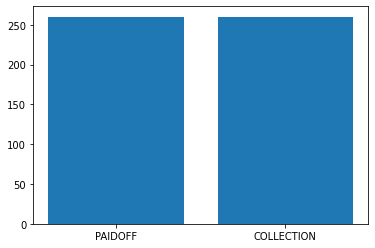

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
oversample = SMOTE()
X2, y2 = oversample.fit_resample(X2, y2)
counter = Counter(y2)
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=4)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (390, 8) (390,)
Test set: (130, 8) (130,)


In [ ]:
y2_train = le.fit_transform(y2_train)
y2_test = le.fit_transform(y2_test)

In [ ]:
y2_train_pred_logr = logr.fit(X2_train, y2_train).predict(X2_train)
y2_test_pred_logr = logr.fit(X2_train, y2_train).predict(X2_test)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm2_logr = confusion_matrix(y2_test, y2_test_pred_logr)
print(cm2_logr)

CONFUSION_MATRIX :

[[52 14]
 [24 40]]


In [ ]:
print('\nClassification Report')
print(classification_report(y2_test,y2_test_pred_logr))


Classification Report
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        66
           1       0.74      0.62      0.68        64

    accuracy                           0.71       130
   macro avg       0.71      0.71      0.71       130
weighted avg       0.71      0.71      0.71       130



In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y2_test_pred_logr,y2_test)

Accuracy on test:



0.7076923076923077

In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y2_train_pred_logr,y2_train)

Accuracy on train:



0.7487179487179487

* Trước khi cân bằng, kết quả mô hình đạt accuracyy là 75,7% trên tập huân luyện và 70% trên tập kiểm tra.
* Sau khi cân bằng dữ liệu, kết quả mô hình đạt accuracy là 75,4% trên tập huấn luyện và 68,5% trên tập kiểm tra. Đây là một kết quả chênh lệch khá lớn giữa hai tập dữ liệu nên có thể nói mô hình không ổn định. 

### **2. Naives Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb

GaussianNB()

In [ ]:
y_test_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
y_train_pred_gnb = gnb.fit(X_train, y_train).predict(X_train)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm_gnb = confusion_matrix(y_test, y_test_pred_gnb)
print(cm_gnb)

CONFUSION_MATRIX :

[[13  5]
 [26 43]]


In [ ]:
print('\nClassification Report')
print(classification_report(y_test,y_test_pred_gnb))


Classification Report
              precision    recall  f1-score   support

           0       0.33      0.72      0.46        18
           1       0.90      0.62      0.74        69

    accuracy                           0.64        87
   macro avg       0.61      0.67      0.60        87
weighted avg       0.78      0.64      0.68        87



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y_train_pred_gnb,y_train)

Accuracy on train:



0.7181467181467182

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y_test_pred_gnb,y_test)

Accuracy on test:



0.6436781609195402

In [ ]:
y2_train_pred_gnb = gnb.fit(X2_train, y2_train).predict(X2_train)
y2_test_pred_gnb = gnb.fit(X2_train, y2_train).predict(X2_test)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm2_gnb = confusion_matrix(y_test, y_test_pred_gnb)
print(cm2_gnb)

CONFUSION_MATRIX :

[[13  5]
 [26 43]]


In [ ]:
print('\nClassification Report')
print(classification_report(y2_test,y2_test_pred_gnb))


Classification Report
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        66
           1       0.76      0.64      0.69        64

    accuracy                           0.72       130
   macro avg       0.73      0.72      0.72       130
weighted avg       0.73      0.72      0.72       130



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y2_train_pred_gnb,y2_train)

Accuracy on train:



0.7512820512820513

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y2_test,y2_test_pred_gnb)

Accuracy on test:



0.7230769230769231

* Trước khi cân bằng, kết quả mô hình đạt accuracy là 71,8 trên tập huấn luyện và 64% trên tập kiểm tra, mô hình không ổn định.
* Sau khi cân bằng dữ liệu, kết quả mô hình đạt accuracy là 76,4% trên tập huấn luyện và 72,3% trên tập kiểm tra. Đây là một kết quả chênh lệch không nhiều giữa hai tập dữ liệu nên có thể nói mô hình tương đối ổn định. 

### **3. Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9, 10],
              'criterion' :['gini', 'entropy'], 
             }
tree_clas = DecisionTreeClassifier(random_state=42)
dc = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
dc

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
dc.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
print(dc.best_params_)

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2'}


In [ ]:
y_test_pred_dc = dc.fit(X_train, y_train).predict(X_test)
y_train_pred_dc = dc.fit(X_train, y_train).predict(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

In [ ]:
print('CONFUSION_MATRIX :\n')
cm_dc = confusion_matrix(y_test_pred_dc,y_test)
print(cm_dc)

CONFUSION_MATRIX :

[[ 9 17]
 [ 9 52]]


In [ ]:
print('\nClassification Report')
print(classification_report(y_test,y_test_pred_dc))


Classification Report
              precision    recall  f1-score   support

           0       0.35      0.50      0.41        18
           1       0.85      0.75      0.80        69

    accuracy                           0.70        87
   macro avg       0.60      0.63      0.60        87
weighted avg       0.75      0.70      0.72        87



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y_train_pred_dc,y_train)

Accuracy on train:



0.7876447876447876

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y_test_pred_dc,y_test)

Accuracy on test:



0.7011494252873564

In [ ]:
y2_test_pred_dc = dc.fit(X2_train, y2_train).predict(X2_test)
y2_train_pred_dc = dc.fit(X2_train, y2_train).predict(X2_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

In [ ]:
print('CONFUSION_MATRIX :\n')
cm2_dc = confusion_matrix(y2_test_pred_dc,y2_test)
print(cm2_dc)

CONFUSION_MATRIX :

[[59 27]
 [ 7 37]]


In [ ]:
print('\nClassification Report')
print(classification_report(y2_test,y2_test_pred_dc))


Classification Report
              precision    recall  f1-score   support

           0       0.69      0.89      0.78        66
           1       0.84      0.58      0.69        64

    accuracy                           0.74       130
   macro avg       0.76      0.74      0.73       130
weighted avg       0.76      0.74      0.73       130



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y2_train_pred_dc,y2_train)

Accuracy on train:



0.7769230769230769

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y2_test,y2_test_pred_dc)

Accuracy on test:



0.7384615384615385

* Trước khi cân bằng, kết quả mô hình đạt accuracy là 78,7 trên tập huấn luyện và 70% trên tập kiểm tra, mô hình tương đối ổn định.
* Sau khi cân bằng dữ liệu, kết quả mô hình đạt accuracy là 78,2% trên tập huấn luyện và 73,1% trên tập kiểm tra. Đây là một kết quả có sự chênh lệch giữa hai tập dữ liệu nên có thể nói mô hình tương đối ổn định.

### **4. Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier(random_state=42)

In [ ]:
rd.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_test_pred_rd = rd.fit(X_train, y_train).predict(X_test)
y_train_pred_rd = rd.fit(X_train, y_train).predict(X_train)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm_rd = confusion_matrix(y_test_pred_rd,y_test)
print(cm_rd)

CONFUSION_MATRIX :

[[ 6  9]
 [12 60]]


In [ ]:
print('\nClassification Report')
print(classification_report(y_test,y_test_pred_rd))


Classification Report
              precision    recall  f1-score   support

           0       0.40      0.33      0.36        18
           1       0.83      0.87      0.85        69

    accuracy                           0.76        87
   macro avg       0.62      0.60      0.61        87
weighted avg       0.74      0.76      0.75        87



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y_train_pred_rd,y_train)

Accuracy on train:



0.806949806949807

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y_test,y_test_pred_rd)

Accuracy on test:



0.7586206896551724

In [ ]:
y2_test_pred_rd = rd.fit(X2_train, y2_train).predict(X2_test)
y2_train_pred_rd = rd.fit(X2_train, y2_train).predict(X2_train)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm2_rd = confusion_matrix(y2_test_pred_rd,y2_test)
print(cm2_rd)

CONFUSION_MATRIX :

[[57 17]
 [ 9 47]]


In [ ]:
print('\nClassification Report')
print(classification_report(y2_test,y2_test_pred_rd))


Classification Report
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        66
           1       0.84      0.73      0.78        64

    accuracy                           0.80       130
   macro avg       0.80      0.80      0.80       130
weighted avg       0.80      0.80      0.80       130



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y2_train_pred_rd,y2_train)

Accuracy on train:



0.8307692307692308

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y2_test,y2_test_pred_rd)

Accuracy on test:



0.8

* Trước khi cân bằng, kết quả mô hình đạt accuracy là 80,7% trên tập huấn luyện và 75,9% trên tập kiểm tra, mô hình tương đối ổn định
* Sau khi cân bằng dữ liệu, kết quả mô hình đạt accuracy là 83,1% trên tập huấn luyện và 80% trên tập kiểm tra. Đây là một kết quả chênh lệch không lớn giữa hai tập dữ liệu nên có thể nói mô hình tương đối ổn định.

### **5. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
estimator_knn = KNeighborsClassifier()
parameters_knn = {
    'n_neighbors': (5,10, 15, 20),
    'leaf_size': (20,30, 40, 50),
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
knn = GridSearchCV(estimator_knn, parameters_knn,cv=5, n_jobs=12, scoring='accuracy', return_train_score=True, error_score=0, verbose=3)
knn

GridSearchCV(cv=5, error_score=0, estimator=KNeighborsClassifier(), n_jobs=12,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': (20, 30, 40, 50),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (5, 10, 15, 20),
                         'weights': ('uniform', 'distance')},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
knn1 = knn.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


In [ ]:
print(knn1.best_params_)

{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'chebyshev', 'n_neighbors': 20, 'weights': 'uniform'}


In [ ]:
y_test_pred_knn = knn1.predict(X_test)
y_train_pred_knn = knn1.predict(X_train)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm_knn = confusion_matrix(y_test_pred_knn,y_test)
print(cm_knn)

CONFUSION_MATRIX :

[[ 3  6]
 [15 63]]


In [ ]:
print('REPORT :\n')
print(classification_report(y_test_pred_knn,y_test))

REPORT :

              precision    recall  f1-score   support

           0       0.17      0.33      0.22         9
           1       0.91      0.81      0.86        78

    accuracy                           0.76        87
   macro avg       0.54      0.57      0.54        87
weighted avg       0.84      0.76      0.79        87



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y_train_pred_knn,y_train)

Accuracy on train:



0.752895752895753

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y_test,y_test_pred_knn)

Accuracy on test:



0.7586206896551724

In [ ]:
knn2 = knn.fit(X2_train, y2_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


In [ ]:
print(knn2.best_params_)

{'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}


In [ ]:
y2_test_pred_knn = knn2.predict(X2_test)
y2_train_pred_knn = knn2.predict(X2_train)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm2_knn = confusion_matrix(y2_test_pred_knn,y2_test)
print(cm2_knn)

CONFUSION_MATRIX :

[[52 22]
 [14 42]]


In [ ]:
print('\nClassification Report')
print(classification_report(y2_test,y2_test_pred_knn))


Classification Report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        66
           1       0.75      0.66      0.70        64

    accuracy                           0.72       130
   macro avg       0.73      0.72      0.72       130
weighted avg       0.73      0.72      0.72       130



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y2_train_pred_knn,y2_train)

Accuracy on train:



0.7512820512820513

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y2_test,y2_test_pred_knn)

Accuracy on test:



0.7230769230769231

* Trước khi cân bằng, kết quả mô hình đạt accuracy là 75,3% trên tập huấn luyện và 75,9% trên tập kiểm tra, mô hình ổn định.
* Sau khi cân bằng dữ liệu, kết quả mô hình đạt accuracy là 75,1% trên tập huấn luyện và 72,3%% trên tập kiểm tra. Đây là một kết quả chênh lệch không lớn giữa hai tập dữ liệu nên có thể nói mô hình khá ổn định.

### **6. SVM**

In [ ]:
from sklearn.svm import SVC
estimator_svm = SVC(random_state = 42)
parameters_svm = {
    'C' :(1, 10, 20),
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'gamma': ('scale', 'auto'),
    'cache_size': (100, 200, 300)}
svm = GridSearchCV(estimator_svm, parameters_svm,cv=5, n_jobs=12, scoring='accuracy', return_train_score=True, error_score=0, verbose=3)
svm

GridSearchCV(cv=5, error_score=0, estimator=SVC(random_state=42), n_jobs=12,
             param_grid={'C': (1, 10, 20), 'cache_size': (100, 200, 300),
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
svm1 = svm.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
print(svm1.best_params_)

{'C': 1, 'cache_size': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
y_test_pred_svm = svm1.predict(X_test)
y_train_pred_svm = svm1.predict(X_train)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm_svm = confusion_matrix(y_test_pred_svm,y_test)
print(cm_svm)

CONFUSION_MATRIX :

[[ 3  9]
 [15 60]]


In [ ]:
print('REPORT :\n')
print(classification_report(y_test_pred_svm,y_test))

REPORT :

              precision    recall  f1-score   support

           0       0.17      0.25      0.20        12
           1       0.87      0.80      0.83        75

    accuracy                           0.72        87
   macro avg       0.52      0.53      0.52        87
weighted avg       0.77      0.72      0.75        87



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y_train_pred_svm,y_train)

Accuracy on train:



0.7722007722007722

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y_test,y_test_pred_svm)

Accuracy on test:



0.7241379310344828

In [ ]:
svm2 = svm.fit(X2_train, y2_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
print(svm2.best_params_)

{'C': 1, 'cache_size': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
y2_test_pred_svm = svm2.predict(X2_test)
y2_train_pred_svm = svm2.predict(X2_train)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm2_svm = confusion_matrix(y2_test_pred_svm,y2_test)
print(cm2_svm)

CONFUSION_MATRIX :

[[55 21]
 [11 43]]


In [ ]:
print('\nClassification Report')
print(classification_report(y2_test,y2_test_pred_svm))


Classification Report
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        66
           1       0.80      0.67      0.73        64

    accuracy                           0.75       130
   macro avg       0.76      0.75      0.75       130
weighted avg       0.76      0.75      0.75       130



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y2_train_pred_svm,y2_train)

Accuracy on train:



0.782051282051282

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y2_test,y2_test_pred_svm)

Accuracy on test:



0.7538461538461538

* Trước khi cân bằng, kết quả mô hình đạt accuracy là 77,2% và 72,4% trên tập kiểm tra, mô hình tương đối ổn định
* Sau khi cân bằng dữ liệu, kết quả mô hình đạt accuracy là 78,2% trên tập huấn luyện và 75,4%% trên tập kiểm tra. Đây là một kết quả chênh lệch không lớn giữa hai tập dữ liệu nên có thể nói mô hình tương đối ổn định.

### **7. AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
estimator_ada = AdaBoostClassifier(random_state = 42)
parameters_ada = {
    'n_estimators' :(50, 100, 200),
    'learning_rate': (1.0, 2.0, 3.0),
    'algorithm': ('SAMME', 'SAMME.R')}
ada = GridSearchCV(estimator_ada, parameters_ada,cv=5, n_jobs=12, scoring='accuracy', return_train_score=True, error_score=0, verbose=3)
ada

GridSearchCV(cv=5, error_score=0, estimator=AdaBoostClassifier(random_state=42),
             n_jobs=12,
             param_grid={'algorithm': ('SAMME', 'SAMME.R'),
                         'learning_rate': (1.0, 2.0, 3.0),
                         'n_estimators': (50, 100, 200)},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
ada1 = ada.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
print(ada1.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}


In [ ]:
y_test_pred_ada = ada1.predict(X_test)
y_train_pred_ada = ada1.predict(X_train)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm_ada = confusion_matrix(y_test_pred_ada,y_test)
print(cm_ada)

CONFUSION_MATRIX :

[[ 0  0]
 [18 69]]


In [ ]:
print('REPORT :\n')
print(classification_report(y_test_pred_ada,y_test))

REPORT :

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.88        87

    accuracy                           0.79        87
   macro avg       0.50      0.40      0.44        87
weighted avg       1.00      0.79      0.88        87



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y_train_pred_ada,y_train)

Accuracy on train:



0.7374517374517374

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y_test,y_test_pred_ada)

Accuracy on test:



0.7931034482758621

In [ ]:
ada2 = ada.fit(X2_train, y2_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
print(ada2.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 50}


In [ ]:
y2_test_pred_ada = ada2.predict(X2_test)
y2_train_pred_ada = ada2.predict(X2_train)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm2_ada = confusion_matrix(y2_test_pred_ada,y2_test)
print(cm2_ada)

CONFUSION_MATRIX :

[[58 22]
 [ 8 42]]


In [ ]:
print('\nClassification Report')
print(classification_report(y2_test,y2_test_pred_ada))


Classification Report
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        66
           1       0.84      0.66      0.74        64

    accuracy                           0.77       130
   macro avg       0.78      0.77      0.77       130
weighted avg       0.78      0.77      0.77       130



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y2_train_pred_ada,y2_train)

Accuracy on train:



0.782051282051282

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y2_test,y2_test_pred_ada)

Accuracy on test:



0.7692307692307693

* Trước khi cân bằng, kết quả mô hình đạt accuracyy là 73,7% trên tập huấn luyện và 79,3% trên tập kiểm tra, mô hình tương đối ổn định.
* Sau khi cân bằng dữ liệu, kết quả mô hình đạt accuracy là 78,2% trên tập huấn luyện và 76,9% trên tập kiểm tra. Đây là một kết quả chênh lệch không lớn giữa hai tập dữ liệu nên có thể nói mô hình khá ổn định.

### **8. GradientBoost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
estimator_gb = GradientBoostingClassifier(random_state = 42)
parameters_gb = {
    'n_estimators' :(50, 100, 200),
    'learning_rate': (1.0, 2.0, 3.0),
    'criterion': ('friedman_mse', 'squared_error'), 
    'max_depth': (3,4,5),
    'max_features': ('auto', 'sqrt', 'log2')}
gb = GridSearchCV(estimator_gb, parameters_gb,cv=5, n_jobs=12, scoring='accuracy', return_train_score=True, error_score=0, verbose=3)
gb

GridSearchCV(cv=5, error_score=0,
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=12,
             param_grid={'criterion': ('friedman_mse', 'squared_error'),
                         'learning_rate': (1.0, 2.0, 3.0),
                         'max_depth': (3, 4, 5),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': (50, 100, 200)},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
gb1 = gb.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [ ]:
print(gb1.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}


In [ ]:
y_test_pred_gb = gb1.predict(X_test)
y_train_pred_gb = gb1.predict(X_train)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm_gb = confusion_matrix(y_test_pred_gb,y_test)
print(cm_gb)

CONFUSION_MATRIX :

[[ 6  9]
 [12 60]]


In [ ]:
print('REPORT :\n')
print(classification_report(y_test_pred_gb,y_test))

REPORT :

              precision    recall  f1-score   support

           0       0.33      0.40      0.36        15
           1       0.87      0.83      0.85        72

    accuracy                           0.76        87
   macro avg       0.60      0.62      0.61        87
weighted avg       0.78      0.76      0.77        87



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y_train_pred_gb,y_train)

Accuracy on train:



0.806949806949807

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y_test,y_test_pred_gb)

Accuracy on test:



0.7586206896551724

In [ ]:
gb2 = gb.fit(X2_train, y2_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [ ]:
print(gb2.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50}


In [ ]:
y2_test_pred_gb = gb2.predict(X2_test)
y2_train_pred_gb = gb2.predict(X2_train)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm2_gb = confusion_matrix(y2_test_pred_gb,y2_test)
print(cm2_gb)

CONFUSION_MATRIX :

[[58 17]
 [ 8 47]]


In [ ]:
print('\nClassification Report')
print(classification_report(y2_test,y2_test_pred_gb))


Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        66
           1       0.85      0.73      0.79        64

    accuracy                           0.81       130
   macro avg       0.81      0.81      0.81       130
weighted avg       0.81      0.81      0.81       130



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y2_train_pred_gb,y2_train)

Accuracy on train:



0.8307692307692308

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y2_test,y2_test_pred_gb)

Accuracy on test:



0.8076923076923077

* Trước khi cân bằng, kết quả mô hình đạt accuracy là 80,7% trên tập huấn luyện và 75,9% trên tập kiểm tra, mô hình khá ổn định.
* Sau khi cân bằng dữ liệu, kết quả mô hình đạt accuracy là 83,1% trên tập huấn luyện và 80,8% trên tập kiểm tra. Đây là một kết quả chênh lệch không lớn giữa hai tập dữ liệu nên có thể nói mô hình khá ổn định.

### **9. XGBoost**



In [ ]:
from xgboost import XGBClassifier
estimator_xgb = XGBClassifier(random_state = 42)
parameters_xgb = {
    'booster' :('gbtree', 'gblinear', 'dart'),
    'eta': (0.1, 0.2, 0.3),
    'alpha' : (10, 20, 30),
    'sampling_method': ('uniform', 'gradient_based'), 
    'max_depth': (6,7,8)}
xgb = GridSearchCV(estimator_xgb, parameters_xgb,cv=5, n_jobs=12, scoring='accuracy', return_train_score=True, error_score=0, verbose=3)
xgb

GridSearchCV(cv=5, error_score=0,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learn...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=12,
             param_grid={'alpha': (10, 20, 30),
                         'booster': ('gbtree', 'gblinear', 'dart'),
                         'eta': (0.1, 0.2, 0.3), 'max_depth': (6, 7, 8),
                         'sampling_method': ('uniform', 'gradient_based')},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
xgb1 = xgb.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [ ]:
print(xgb1.best_params_)

{'alpha': 10, 'booster': 'gbtree', 'eta': 0.1, 'max_depth': 6, 'sampling_method': 'uniform'}


In [ ]:
y_test_pred_xgb = xgb1.predict(X_test)
y_train_pred_xgb = xgb1.predict(X_train)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm_xgb = confusion_matrix(y_test_pred_xgb,y_test)
print(cm_xgb)

CONFUSION_MATRIX :

[[ 0  0]
 [18 69]]


In [ ]:
print('REPORT :\n')
print(classification_report(y_test_pred_xgb,y_test))

REPORT :

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.88        87

    accuracy                           0.79        87
   macro avg       0.50      0.40      0.44        87
weighted avg       1.00      0.79      0.88        87



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y_train_pred_xgb,y_train)

Accuracy on train:



0.7374517374517374

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y_test,y_test_pred_xgb)

Accuracy on test:



0.7931034482758621

In [ ]:
xgb2 = xgb.fit(X2_train, y2_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [ ]:
print(xgb2.best_params_)

{'alpha': 10, 'booster': 'gbtree', 'eta': 0.1, 'max_depth': 6, 'sampling_method': 'uniform'}


In [ ]:
y2_test_pred_xgb = xgb2.predict(X2_test)
y2_train_pred_xgb = xgb2.predict(X2_train)

In [ ]:
print('CONFUSION_MATRIX :\n')
cm2_xgb = confusion_matrix(y2_test_pred_xgb,y2_test)
print(cm2_xgb)

CONFUSION_MATRIX :

[[60 30]
 [ 6 34]]


In [ ]:
print('\nClassification Report')
print(classification_report(y2_test,y2_test_pred_xgb))


Classification Report
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        66
           1       0.85      0.53      0.65        64

    accuracy                           0.72       130
   macro avg       0.76      0.72      0.71       130
weighted avg       0.76      0.72      0.71       130



In [ ]:
print('Accuracy on train:\n') 
metrics.accuracy_score(y2_train_pred_xgb,y2_train)

Accuracy on train:



0.7487179487179487

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y2_test,y2_test_pred_xgb)

Accuracy on test:



0.7230769230769231

* Trước khi cân bằng, kết quả mô hình đạt accuracy là 73,7% trên tập huấn luyện và 79,3% trên tập kiểm tra, mô hình tương đối ổn địnk.
* Sau khi cân bằng dữ liệu, kết quả mô hình đạt accuracy là 74,9% trên tập huấn luyện và 72,3% trên tập kiểm tra. Đây là một kết quả chênh lệch không lớn giữa hai tập dữ liệu nên có thể nói mô hình khá ổn định.

## **V. Conclusion**

In [ ]:
# Precision Logistic Regression
pc_logr = metrics.precision_score(y2_test, y2_test_pred_logr)
# Precision Naives Bayes
pc_gnb = metrics.precision_score(y2_test, y2_test_pred_gnb)
# Precision Decision Tree
pc_dc = metrics.precision_score(y2_test, y2_test_pred_dc)
# Precision Random forest
pc_rd = metrics.precision_score(y2_test, y2_test_pred_rd)
# Precision KNN
pc_knn = metrics.precision_score(y2_test, y2_test_pred_knn)
# Precision SVM
pc_svm = metrics.precision_score(y2_test, y2_test_pred_svm)
# Precision AdaBoost
pc_ada = metrics.precision_score(y2_test, y2_test_pred_ada)
# Precision GradientBoost
pc_gb = metrics.precision_score(y2_test, y2_test_pred_gb)
# Precision XGBoost
pc_xgb = metrics.precision_score(y2_test, y2_test_pred_xgb)

list_pc = [pc_logr, pc_gnb, pc_dc, pc_rd, pc_knn, pc_svm, pc_ada, pc_gb, pc_xgb]
list_pc

[0.7407407407407407,
 0.7592592592592593,
 0.8409090909090909,
 0.8392857142857143,
 0.75,
 0.7962962962962963,
 0.84,
 0.8545454545454545,
 0.85]

In [ ]:
# Recall Logistic Regression
ac_logr = metrics.accuracy_score(y2_test, y2_test_pred_logr)
# Recall Naives Bayes
rc_gnb = metrics.accuracy_score(y2_test, y2_test_pred_gnb)
# Recall Decision Tree
rc_dc = metrics.accuracy_score(y2_test, y2_test_pred_dc)
# Recall Random forest
rc_rd = metrics.accuracy_score(y2_test, y2_test_pred_rd)
# Recall KNN
rc_knn = metrics.accuracy_score(y2_test, y2_test_pred_knn)
# Recall SVM
rc_svm = metrics.accuracy_score(y2_test, y2_test_pred_svm)
# Recall AdaBoost
rc_ada = metrics.accuracy_score(y2_test, y2_test_pred_ada)
# Recall GradientBoost
rc_gb = metrics.accuracy_score(y2_test, y2_test_pred_gb)
# Recall XGBoost
rc_xgb = metrics.recall_score(y2_test, y2_test_pred_xgb)

list_rc = [rc_logr, rc_gnb, rc_dc, rc_rd, rc_knn, rc_svm, rc_ada, rc_gb, rc_xgb]
list_rc

[0.625,
 0.640625,
 0.578125,
 0.734375,
 0.65625,
 0.671875,
 0.65625,
 0.734375,
 0.53125]

In [ ]:
# F1-score Logistic Regression
f1_logr = metrics.f1_score(y2_test, y2_test_pred_logr)
# F1-score Naives Bayes
f1_gnb = metrics.f1_score(y2_test, y2_test_pred_gnb)
# F1-score Decision Tree
f1_dc = metrics.f1_score(y2_test, y2_test_pred_dc)
# F1-score Random forest
f1_rd = metrics.f1_score(y2_test, y2_test_pred_rd)
# F1-score KNN
f1_knn = metrics.f1_score(y2_test, y2_test_pred_knn)
# F1-score SVM
f1_svm = metrics.f1_score(y2_test, y2_test_pred_svm)
# F1-score AdaBoost
f1_ada = metrics.f1_score(y2_test, y2_test_pred_ada)
# F1-score GradientBoost
f1_gb = metrics.f1_score(y2_test, y2_test_pred_gb)
# F1-score XGBoost
f1_xgb = metrics.f1_score(y2_test, y2_test_pred_xgb)

list_f1 = [f1_logr, f1_gnb, f1_dc, f1_rd, f1_knn, f1_svm, f1_ada, f1_gb, f1_xgb]
list_f1

[0.6779661016949152,
 0.6949152542372882,
 0.6851851851851852,
 0.7833333333333332,
 0.7,
 0.728813559322034,
 0.736842105263158,
 0.7899159663865547,
 0.6538461538461537]

In [ ]:
# Accuracy Logistic Regression
ac_logr = metrics.accuracy_score(y2_test, y2_test_pred_logr)
# Accuracy Naives Bayes
ac_gnb = metrics.accuracy_score(y2_test, y2_test_pred_gnb)
# Accuracy Decision Tree
ac_dc = metrics.accuracy_score(y2_test, y2_test_pred_dc)
# Accuracy Random forest
ac_rd = metrics.accuracy_score(y2_test, y2_test_pred_rd)
# Accuracy KNN
ac_knn = metrics.accuracy_score(y2_test, y2_test_pred_knn)
# Accuracy SVM
ac_svm = metrics.accuracy_score(y2_test, y2_test_pred_svm)
# Accuracy AdaBoost
ac_ada = metrics.accuracy_score(y2_test, y2_test_pred_ada)
# AccuracyGradientBoost
ac_gb = metrics.accuracy_score(y2_test, y2_test_pred_gb)
# Accuracy XGBoost
ac_xgb = metrics.accuracy_score(y2_test, y2_test_pred_xgb)

list_ac = [ac_logr, ac_gnb, ac_dc, ac_rd, ac_knn, ac_svm, ac_ada, ac_gb, ac_xgb]
list_ac

[0.7076923076923077,
 0.7230769230769231,
 0.7384615384615385,
 0.8,
 0.7230769230769231,
 0.7538461538461538,
 0.7692307692307693,
 0.8076923076923077,
 0.7230769230769231]

Sau khi chạy các mô hình, ta có bảng tổng kết sau:

In [ ]:
data = pd.DataFrame(list_pc,index=['Logistic Regression','Naives Bayes','Decision Tree','Random forest', 'KNN', 'SVM', 'AdaBoost', 'GradientBoost', 'XGBoost'])
data.columns = ['Precision']
data.insert(loc=1, column='Recall', value=list_rc)
data.insert(loc=2, column='F1-score', value=list_f1)
data.insert(loc=3, column='Accuracy', value=list_ac)
data.columns.name = 'Model'
data

Model,Precision,Recall,F1-score,Accuracy
Logistic Regression,0.740741,0.625000,0.677966,0.707692
Naives Bayes,0.759259,0.640625,0.694915,0.723077
Decision Tree,0.840909,0.578125,0.685185,0.738462
Random forest,0.839286,0.734375,0.783333,0.800000
KNN,0.750000,0.656250,0.700000,0.723077
SVM,0.796296,0.671875,0.728814,0.753846
AdaBoost,0.840000,0.656250,0.736842,0.769231
GradientBoost,0.854545,0.734375,0.789916,0.807692
XGBoost,0.850000,0.531250,0.653846,0.723077


=> Sau khi cân bằng lại dữ liệu ở cột 'loan_status. Ta có Gradient Boost cho ra mô hình có độ chính xác nhất.

## **VI. Model Evaluation using Test set**

Ta sẽ sử dụng mô hình XGBoost để đánh giá Test set dưới đây:

In [ ]:
link1 = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'
df_test = pd.read_csv(link1,encoding= 'unicode_escape')

In [ ]:
df_test.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [ ]:
# bỏ 2 cột đầu tiên
df_test.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis = 1,inplace=True)

In [ ]:
#Chia 3 nhóm tuổi. Nhóm 1 từ 18 tới 24 tuổi, nhóm 2 từ 25 tới 40 tuổi và nhóm 3 từ 41 tới 51 tuổi
df_test.loc[df1['age'] < 25, 'age_group'] = int(1)
df_test.loc[(df1['age'] >=25)&(df1['age'] < 41), 'age_group'] = int(2)
df_test.loc[df1['age'] >=41, 'age_group'] = int(3)

In [ ]:
#Chuyển ngày tháng về dạng date time
df_test['due_date'] = pd.to_datetime(df_test['due_date'])
df_test['effective_date'] = pd.to_datetime(df_test['effective_date'])

In [ ]:
#Kiểm tra ngày trả khoản vay lần đầu tiên có phải ngày cuối tuần hay không? và chuyển về biến binary
df_test["Is Weekend"] = df_test['effective_date'].dt.day_name().isin(['Saturday', 'Sunday'])
df_test['Is Weekend'].replace(to_replace=[False,True], value=[0,1],inplace=True)

In [ ]:
#Chuyển cột giới tính về dạng biến binary
df_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [ ]:
#Sử dụng onehot để đưa các biến category còn lại về dạng biến binary
Feature_test = df_test[['Principal','terms', 'age_group','Gender','education','Is Weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(df_test['education'])], axis=1)

In [ ]:
#Bỏ cột 'Master or Above' và 'education
Feature_test.drop(['Master or Above', 'education'],axis = 1,inplace=True)

In [ ]:
#check giá trị trả về cột 'loan_status'
df_test['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [ ]:
#Cân bằng dữ liệu
X3 = np.asanyarray(Feature_test)
y3 = np.asanyarray(df_test['loan_status'])

In [ ]:
X3 = preprocessing.StandardScaler().fit(X3).transform(X3)

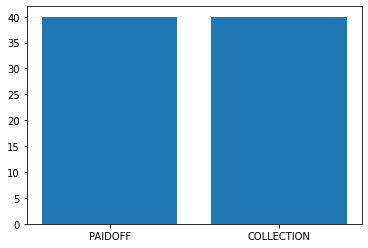

In [ ]:
oversample = SMOTE()
X3, y3 = oversample.fit_resample(X3, y3)
counter_3 = Counter(y3)
plt.bar(counter_3.keys(), counter_3.values())
plt.show()

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=42)
print ('Train set:', X3_train.shape,  y3_train.shape)
print ('Test set:', X3_test.shape,  y3_test.shape)

Train set: (60, 8) (60,)
Test set: (20, 8) (20,)


In [ ]:
y3_train = le.fit_transform(y3_train)
y3_test = le.fit_transform(y3_test)

In [ ]:
y3_test_pred_gb = gb.fit(X3_train, y3_train).predict(X3_test)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [ ]:
print('REPORT :\n')
print(classification_report(y3_test_pred_gb,y3_test))

REPORT :

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



In [ ]:
print('Precision :\n')
metrics.precision_score(y3_test,y3_test_pred_gb)

Precision :



0.9

In [ ]:
print('Recall :\n')
metrics.recall_score(y3_test,y3_test_pred_gb)

Recalln :



0.8181818181818182

In [ ]:
print('F1_score :\n')
metrics.f1_score(y3_test,y3_test_pred_gb)

F1_score :



0.8571428571428572

In [ ]:
print('Accuracy on test:\n') 
metrics.accuracy_score(y3_test,y3_test_pred_gb)

Accuracy on test:



0.85